1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

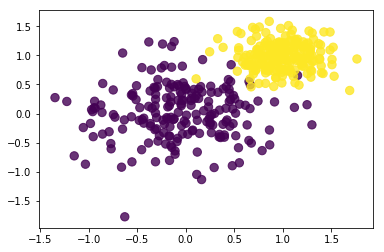

In [103]:
from IPython.display import Image,display
Image('two_categories_scatter_plot.png')

In [104]:
import numpy as np
import matplotlib.pyplot as plt

def generate_datasets(size, means, std_devs):
    lenght = len(means)
    for i in range(lenght):
        x[i] = np.random.normal(means[i],std_devs[i],size)
        y[i]= np.random.normal(means[i],std_devs[i],size)
    
    return x, y


means = [0.1 , 0.3]
std_devs = [0.2,0.3]

x, y= generate_datasets(1000, means,std_devs)


plt.scatter(x[0], y[0], c='purple',alpha=0.5)

plt.scatter(x[1], y[1], c='coral',alpha=0.5)


plt.title('two_categories_scatter_plot.png')

plt.show()



ValueError: setting an array element with a sequence.

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [159]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

--2021-12-03 10:51:43--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2021-12-03 10:51:43--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce18b3959efff4afefc88c17bbc.dl.dropboxusercontent.com/cd/0/inline/BbKImBh2p4Blg9LU9DNIn3JnjYK4_JgoZ9OUnddt5xBDYoibUDLtQ-3hKAlM4QPwMKAQ4DLMs1wiQXIVnDVzKy1hbaRd84RUTfUcF1j-lrG34roBkDUmkBEOcZPcVJG884XDY6rZ0zTlK_NZ24kKLE1p/file# [following]
--2021-12-03 10:51:43--  https://uce18b3959efff4afefc88c17bbc.dl.dropboxusercontent.com/cd/0/inline/BbKImBh2p4Blg9LU9DNIn3JnjYK4_JgoZ9OUnddt5xBDYoibUDLtQ-3hKAlM4QPwMKAQ4DLMs1wiQXIVnDVzKy1hbaRd84RUTfUcF

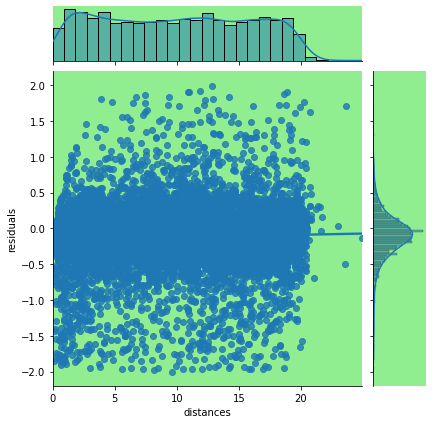

In [160]:
data = np.load('./data/residuals_261.pkl', allow_pickle = "true").item()

data = pd.DataFrame(data)

df = pd.DataFrame(data, columns=['residuals', 'distances'])
df

df = df[df["residuals"].abs() < 2]
df

import seaborn as sns

sns.jointplot(x='distances', y='residuals', data=df, kind='reg')


as can be seen from the plot distances and residuals have different  distrubitions one has gaussian the other has normal distrubition and has no correlation if we check the flat line .

Text(0, 0.5, 'Residuals')

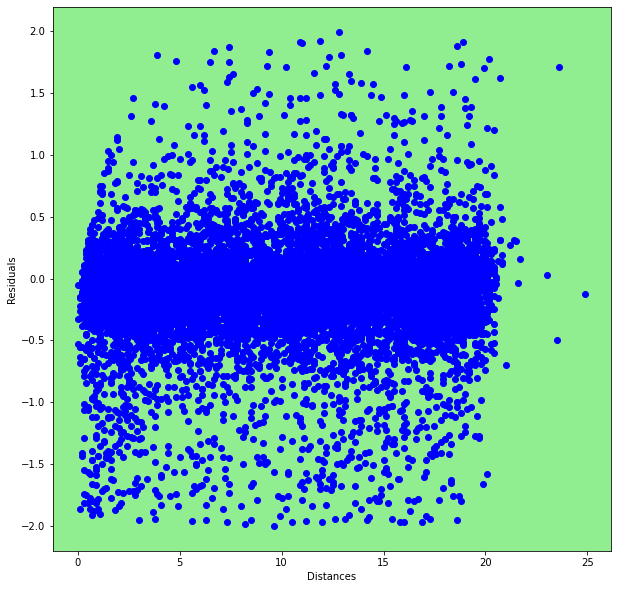

In [161]:
plt.figure(figsize=(10,10))
plt.scatter(df["distances"], df["residuals"], c  ="blue")
plt.xlabel("Distances")
plt.ylabel("Residuals")

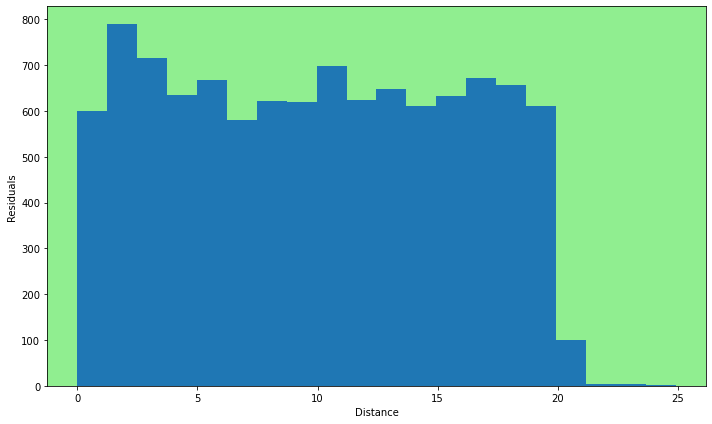

In [162]:
fig, ax = plt.subplots(figsize=(10, 6))
h, bins, _ = plt.hist(df['distances'], bins=20)
ax.set_xlabel('Distance')
ax.set_ylabel('Residuals')
fig.tight_layout()

In [163]:
x=[]
y=[]
err_y=[]
for index in range(len(bins)-1):
    left=bins[index]
    right=bins[index+1]
    center=(right - left) / 2 + left
    mean=df[(df['distances'] >= left) & (df['distances'] <= right)]['residuals'].mean()
    std=df[(df['distances'] >= left) & (df['distances'] <= right)]['residuals'].std()
    x.append(center)
    y.append(mean)
    err_y.append(std)
##creating x the array of bin centers of the profile histogram of the "distance" variable
x=np.array(x)
##creating y the mean values of the "residuals", estimated in slices (bins) of "distance"
y=np.array(y)
##creating err_y the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
err_y=np.array(err_y)
print(x)
print(y)
print(err_y)

[ 0.6225  1.8675  3.1125  4.3575  5.6025  6.8475  8.0925  9.3375 10.5825
 11.8275 13.0725 14.3175 15.5625 16.8075 18.0525 19.2975 20.5425 21.7875
 23.0325 24.2775]
[-0.20298651 -0.16346985 -0.16058613 -0.13457787 -0.13448661 -0.09600764
 -0.09284342 -0.08822673 -0.0591651  -0.08039035 -0.11016332 -0.14977026
 -0.13796675 -0.15048569 -0.13854145 -0.07072831  0.05114286  0.20133333
  0.41285714 -0.12857143]
[0.46906745 0.42093315 0.40510863 0.4152323  0.41254988 0.47127579
 0.41610324 0.41383771 0.46252125 0.46764395 0.49306768 0.44858705
 0.47054736 0.4176323  0.41132145 0.38352696 0.49544021 0.14407945
 1.15402844        nan]


<ErrorbarContainer object of 3 artists>

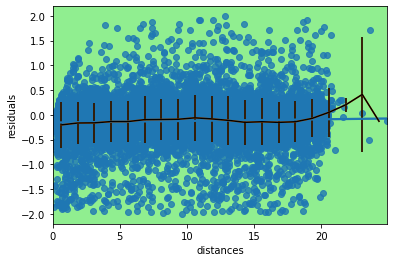

In [164]:
ax = sns.regplot(x='distances', y='residuals', data=df)
ax.errorbar(x, y, yerr=err_y)
ax.errorbar(x, y, err_y, color = 'black')

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


In [207]:
##filing numpy array x with lenght of 100
x=np.random.normal(loc=0., scale=1, size=500)
x

array([ 2.81971045e+00, -2.29902878e+00, -4.62530907e-01, -1.48739409e+00,
       -3.95032493e-01, -3.99072293e-01,  2.20052126e-02,  5.85506290e-01,
       -2.29202317e+00, -2.87541249e-01,  9.98330573e-01,  1.15876712e+00,
        5.78673825e-01, -3.31886424e-01, -5.18801600e-01, -1.03104359e+00,
        9.74340595e-02,  1.09537149e+00, -1.22386144e-01,  1.67102603e-01,
        5.34835561e-01,  5.41876687e-01, -5.47212122e-01, -6.57908710e-02,
       -5.88220301e-01,  2.51662642e-01, -7.38126524e-01, -8.80558178e-01,
       -1.67023436e+00,  1.07467115e+00,  1.02976862e+00,  1.93631160e+00,
        4.13448899e-01,  6.29080090e-01,  3.03841142e-01,  1.07871711e+00,
        3.92035511e-01, -8.78329829e-01,  2.18043540e+00,  1.04148419e+00,
        1.11779698e+00, -1.44554249e+00, -6.61481695e-01, -6.79823246e-01,
       -3.51233644e-01,  1.23878426e+00, -1.88436152e+00,  4.86302257e-01,
        7.59972845e-02,  9.35720502e-01, -1.78778119e-01, -1.44704496e+00,
        1.72016401e-01, -

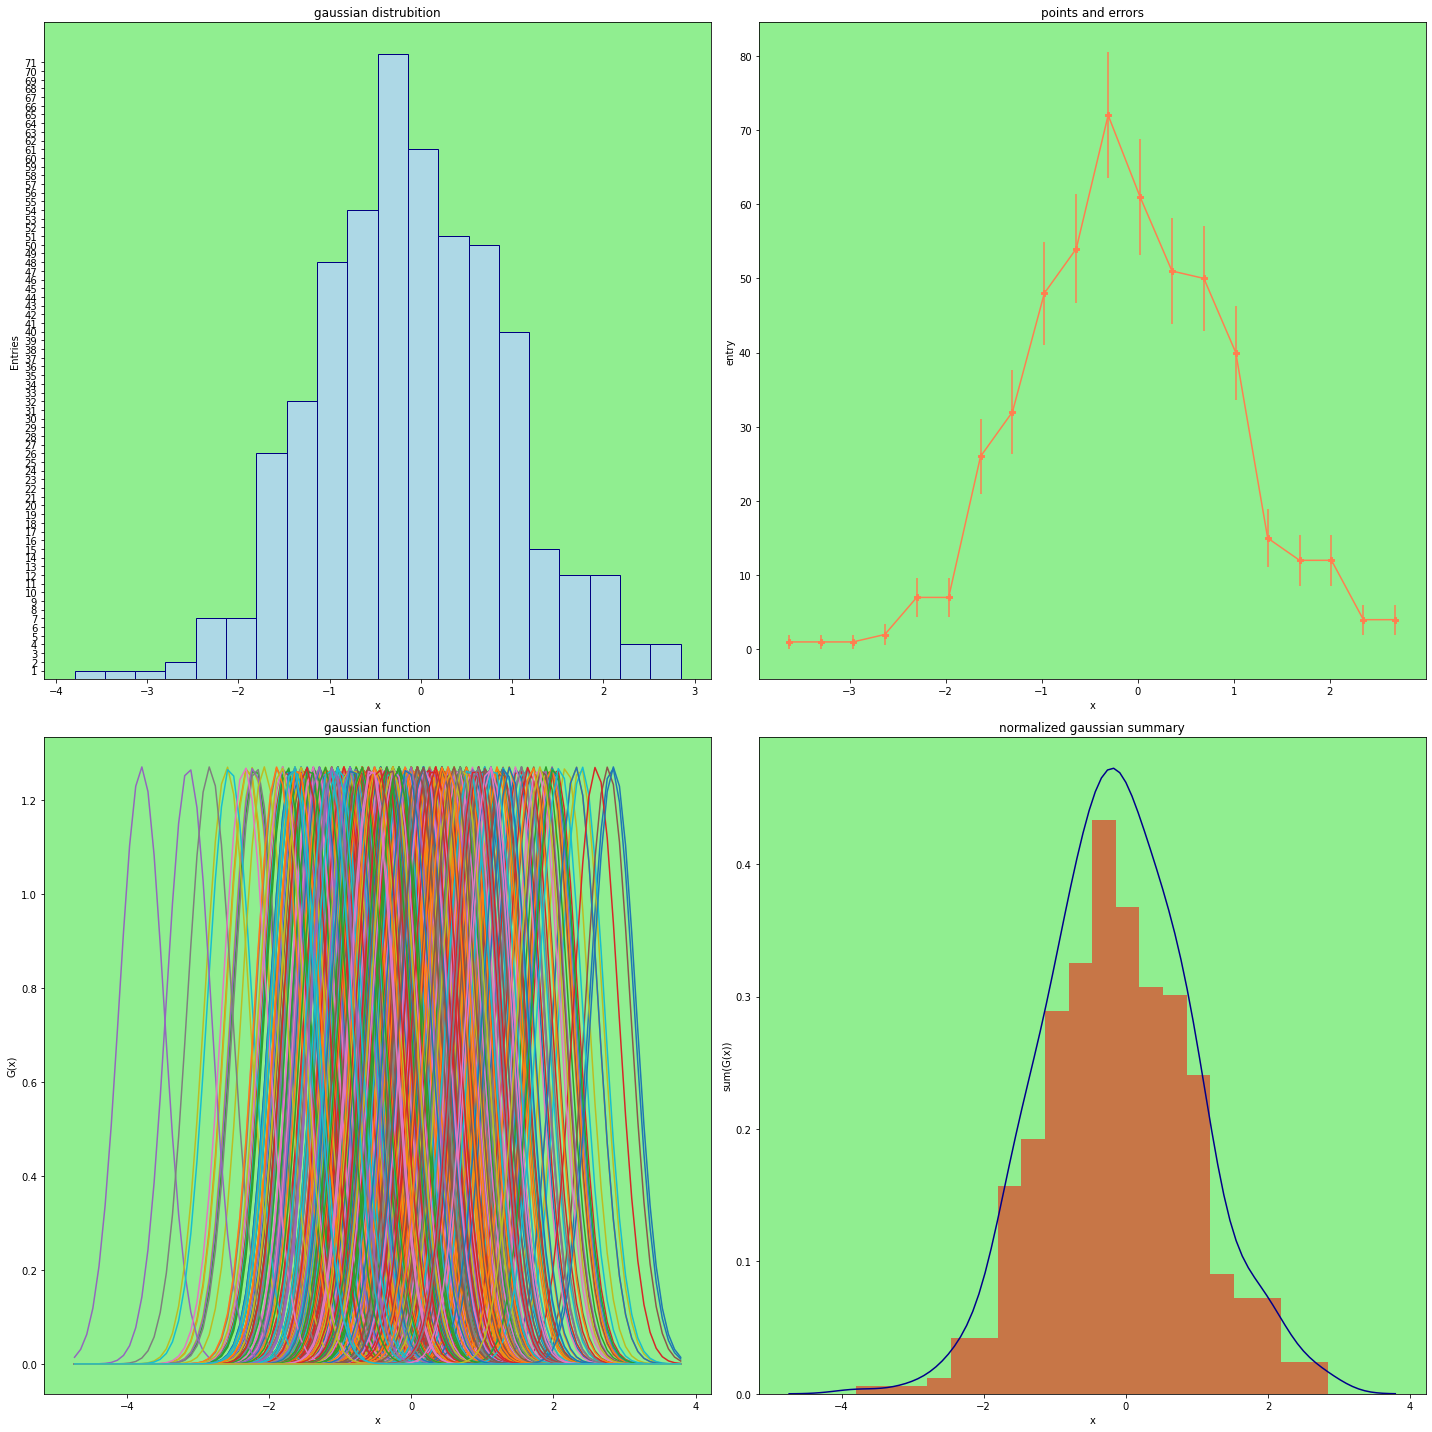

In [208]:
import scipy.stats as stats
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
##plot11
h, bins, _ = ax[0,0].hist(x, bins=20, range=(np.min(x), np.max(x)), density=False, cumulative=False, color="lightblue", edgecolor='navy')
ax[0,0].set_title('gaussian distrubition')
ax[0,0].set_xlabel('x')  
ax[0,0].set_ylabel('Entries')  
ax[0,0].set_yticks(np.arange(np.min(h),np.max(h)))
##plot2
x_bins= (bins[1:]+bins[:-1])/2
ax[0,1].errorbar(x=x_bins, y=h, yerr=np.sqrt(h), c="coral", marker="P",alpha=1)
ax[0,1].set_title('points and errors')
ax[0,1].set_xlabel('x')  
ax[0,1].set_ylabel('entry')  
##plot3
meanvalues=x
std_dev=1.06*np.std(x)*len(x)**(-1/5)
x_exes = np.linspace(np.min(meanvalues) - 3*std_dev, np.max(meanvalues) + 3*std_dev, 100)
y_exes= np.array([stats.norm.pdf(x_exes, meanvalues[i], std_dev) for i in range(len(x)) ])
for i in y_exes: ax[1,0].plot(x_exes, i)
ax[1,0].set_title('gaussian function')
ax[1,0].set_xlabel('x')  
ax[1,0].set_ylabel('G(x)')  
##plot4
sumary_y=np.sum(y_exes, axis=0)
normal=np.trapz(sumary_y, dx=0.07)
sumary_y/=normal
ax[1,1].hist(x, bins=20, range=(np.min(x), np.max(x)), density=True, cumulative=False, color="red", alpha=0.5)
ax[1,1].plot(x_exes, sumary_y, color="darkblue")
ax[1,1].set_title('normalized gaussian summary')
ax[1,1].set_xlabel('x')  
ax[1,1].set_ylabel('sum(G(x))') 
fig.tight_layout()